In [1]:
import numpy as np
import scipy
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt

# Q1

In [6]:
A = np.array([[1, 1], [1, 1+1e-10]])
np.linalg.cond(A) # Checking for condition number

39999991794.0589

In [33]:
def cond(A):   
    U, s, Vh =scipy.linalg.svd(A)    
    cond=max(s)/min(s)
    return cond

In [27]:
B= np.array([[0, 1], [1, 0]])

In [28]:
cond(B)

1.0

In [29]:
C= np.array([[0, 0], [0, 0]])

In [30]:
cond(C)

C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

# Q 2

In [35]:
w_roots = np.arange(1, 21)

In [37]:
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6]) # These are the correct polynomials!

[1 -210 20615 -1256850 53327946 -1672280820]


In [38]:
h = np.zeros(21)
h[1]=1e-7
new_coeffs = w_coeffs - h
print(new_coeffs[:6]) #perturbation

[1 -210.000000100000 20615 -1256850 53327946 -1672280820]


In [41]:
# Use NumPy to compute the roots of the perturbed polynomial.
new_roots = np.roots(np.poly1d(new_coeffs)) 
print(new_roots) #completely different

[20.78883005+0.j         19.4596845 +1.87437534j 19.4596845 -1.87437534j
 16.72515555+2.73162478j 16.72515555-2.73162478j 14.01136772+2.44967422j
 14.01136772-2.44967422j 11.82164427+1.59965229j 11.82164427-1.59965229j
 10.12126327+0.60484685j 10.12126327-0.60484685j  8.92663152+0.j
  8.00662322+0.j          6.99967203+0.j          6.0000132 +0.j
  4.99999945+0.j          4.00000002+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]


In [43]:
# This is bad: Check the condition number
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)
# Estimate the absolute condition number in the infinity norm.
k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
print(k)

28262385.815815903


# Q5

In [185]:
xk, yk = np.load("stability_data.npy").T

In [10]:
def polyno(n,xk,xy):
    x=np.vander(xk, n+1)
    #x=np.array([xk, xk2]).T
    poly=la.inv(x.T@x) @ x.T@ yk
    print(poly)
    pred=np.dot(x,poly) 
    #A=np.hstack((x,yk))
    q, r = la.qr(x,mode='economic')
    coeff=la.solve_triangular(r,np.dot(q.T,yk))
    print(coeff)
    pred2=np.dot(x,coeff)   
    forward_error = la.norm(poly- coeff)
    return poly, pred, pred2,forward_error

[-7.49306018e+05  4.35050096e+06 -1.09656593e+07  1.57060010e+07
 -1.40368100e+07  8.07421677e+06 -2.96000465e+06  6.50957908e+05
 -7.07737871e+04  3.04435666e+02  6.12559821e+02 -3.15633974e+01
  1.23096171e+00]
[-6.35890591e+05  3.67416000e+06 -9.20048529e+06  1.30581904e+07
 -1.15162848e+07  6.48780175e+06 -2.29291629e+06  4.65889245e+05
 -3.81141306e+04 -3.11461128e+03  7.99127579e+02 -3.56067561e+01
  1.24512231e+00]
4466221.729000935


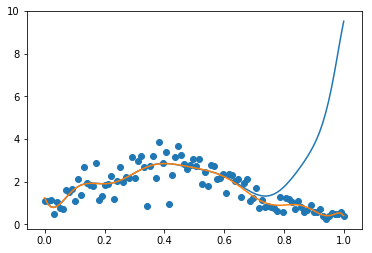

In [187]:
poly,pred,pred2,forward_error=polyno(12,xk,xy)
print(forward_error)
plt.scatter(xk, yk )
plt.plot(xk, pred)
plt.plot(xk, pred2)

0.19635306381516965


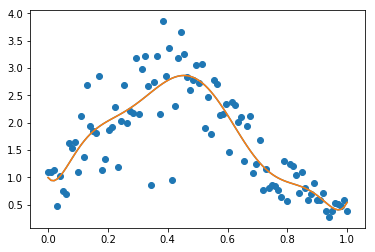

In [170]:
poly,pred,pred2,forward_error=polyno(8,xk,xy)
print(forward_error)
plt.scatter(xk, yk )
plt.plot(xk, pred)
plt.plot(xk, pred2)

# Q6

In [37]:
def intfun(n):
    out=(-1)**n*sy.subfactorial(n)+(-1)**(n+1)*(sy.factorial(n)/np.exp(1))
    return out
    

In [38]:
forward_error=np.empty([10])
ixt=0
x= sy.symbols('x')
for n in range(5,51,5):
    out=(sy.integrate(x**n*sy.exp(x-1),(x,0,1))).evalf()
    out2=intfun(n).evalf()
    forward_error[ixt]= np.abs(out-out2)/np.abs(out)
    ixt=ixt+1
    print(out)

0.145532940573079
0.0838770701033942
0.0590175408792978
0.0455448840758181
0.0370862144237392
0.0312796739321681
0.0270462894090608
0.0238227286690335
0.0212860390856061
0.0192377544343394


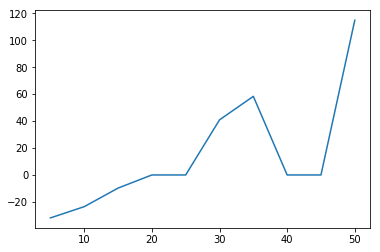

In [31]:
x=np.arange(5,51,5)
plt.plot(x, np.log(forward_error))